In [3]:
import pandas as pd

DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


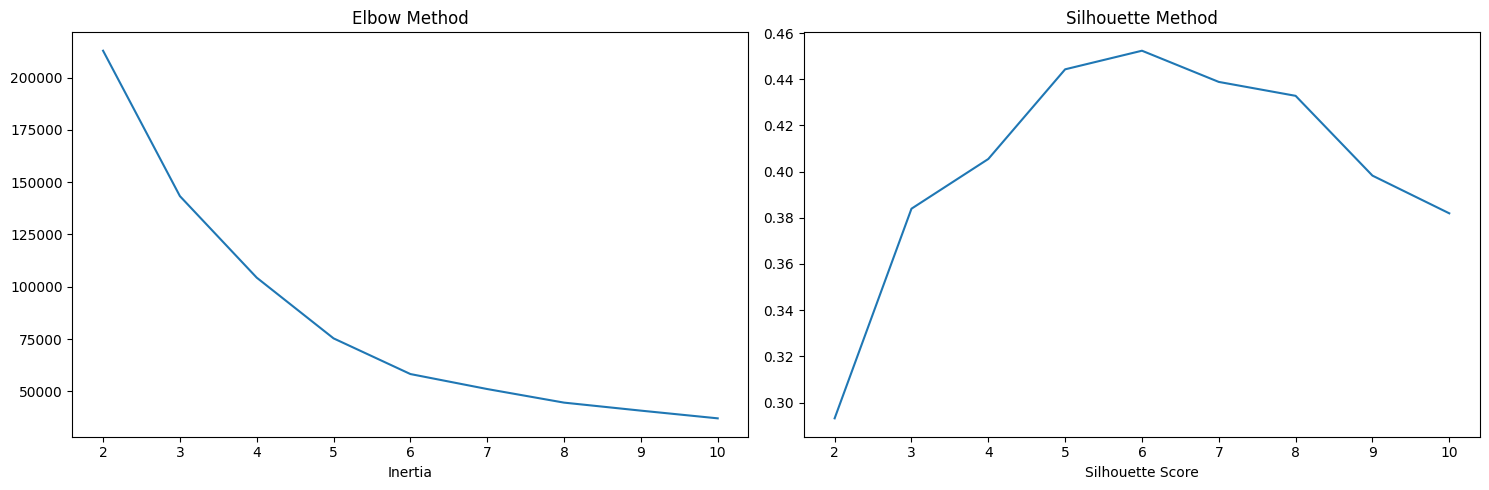

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), tight_layout=True)

elbow = {}
silhouette = []

RANDOM_STATE = 42
k_range = range(2, 11)

X = df.drop("Gender", axis=1)

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X)
    elbow[i] = kmeans.inertia_

    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels))

sns.lineplot(x=list(elbow.keys()), y=list(elbow.values()), ax=axs[0])
axs[0].set_xlabel("K")
axs[0].set_xlabel("Inertia")
axs[0].set_title("Elbow Method")

sns.lineplot(x=list(k_range), y=silhouette, ax=axs[1])
axs[1].set_xlabel("K")
axs[1].set_xlabel("Silhouette Score")
axs[1].set_title("Silhouette Method")

plt.show()


In [5]:
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE, n_init=10)
kmeans.fit(X)
kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [6]:
import joblib

joblib.dump(kmeans, "../modelos/kmeans.pkl")

['../modelos/kmeans.pkl']

In [7]:
df_clustered = df.copy()
df_clustered["cluster"] = kmeans.labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [8]:
df_clustered.to_csv("../dados/Mall_Customers_no_CustomerID_clustered.csv", index=False)

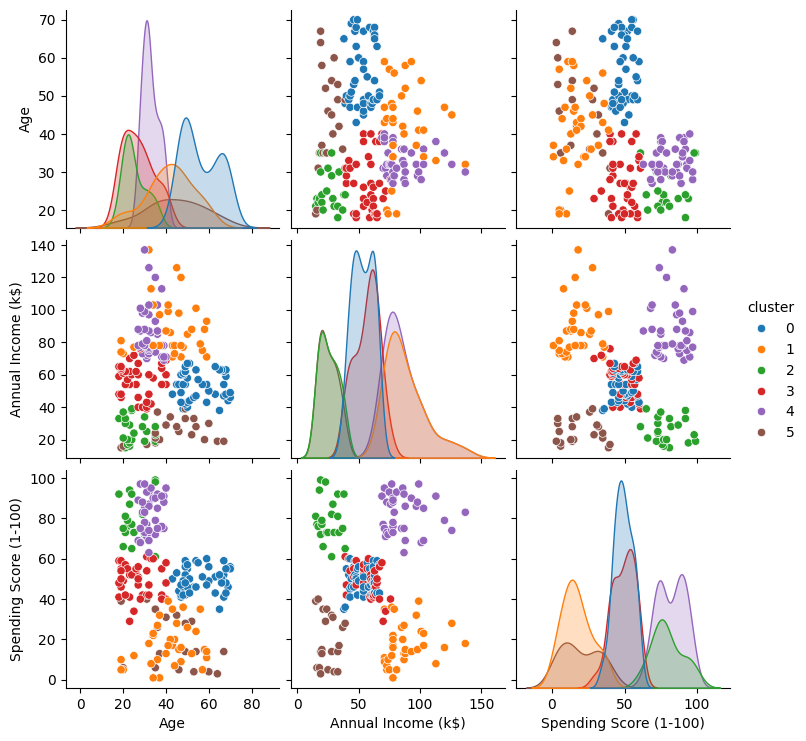

In [9]:
sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");

C:\Users\c1r6\AppData\Local\Temp\ipykernel_13552\3406456183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")
C:\Users\c1r6\AppData\Local\Temp\ipykernel_13552\3406456183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")
C:\Users\c1r6\AppData\Local\Temp\ipykernel_13552\3406456183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")


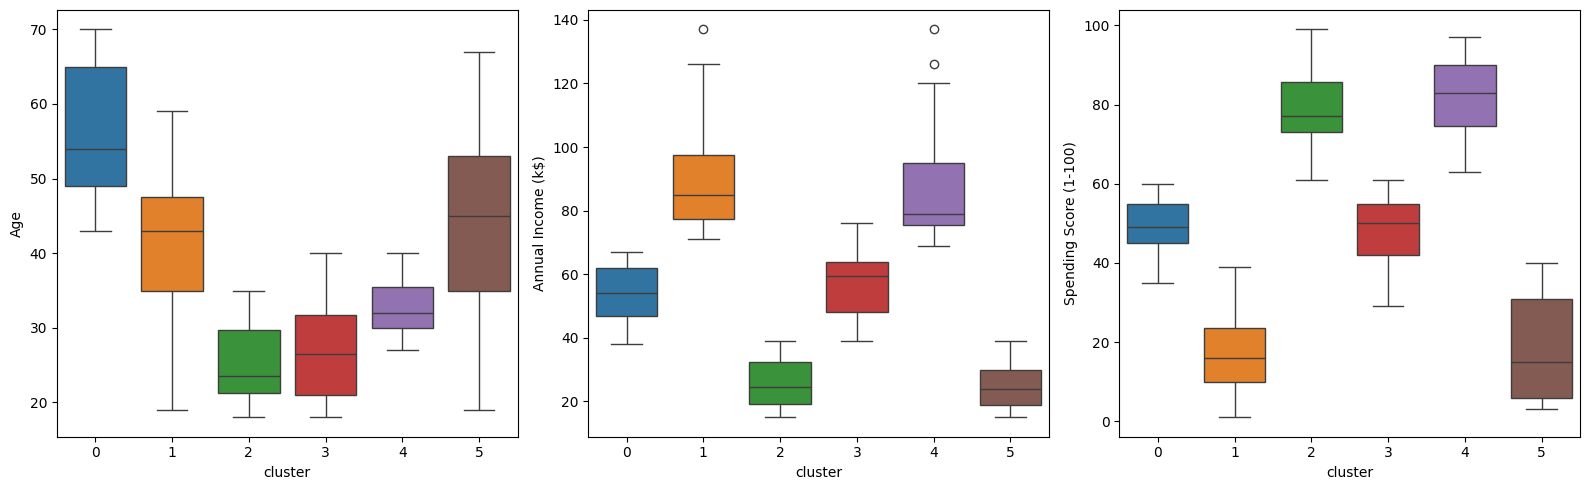

In [10]:
# Ajustando o tamanho e layout da figura
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), tight_layout=True)

# Adicionando cores distintas para os grupos de gênero utilizando a paleta "Set2"
for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")

# Exibindo o gráfico
plt.show()

In [11]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    45
1    35
2    22
3    38
4    39
5    21
Name: count, dtype: int64

In [12]:
df_clustered["cluster"].value_counts(normalize=True).mul(100).sort_index()

cluster
0    22.5
1    17.5
2    11.0
3    19.0
4    19.5
5    10.5
Name: proportion, dtype: float64

In [15]:
df_clustered.groupby(by=["cluster", "Gender"]).size()

cluster  Gender
0        Female    25
         Male      20
1        Female    15
         Male      20
2        Female    13
         Male       9
3        Female    25
         Male      13
4        Female    21
         Male      18
5        Female    13
         Male       8
dtype: int64

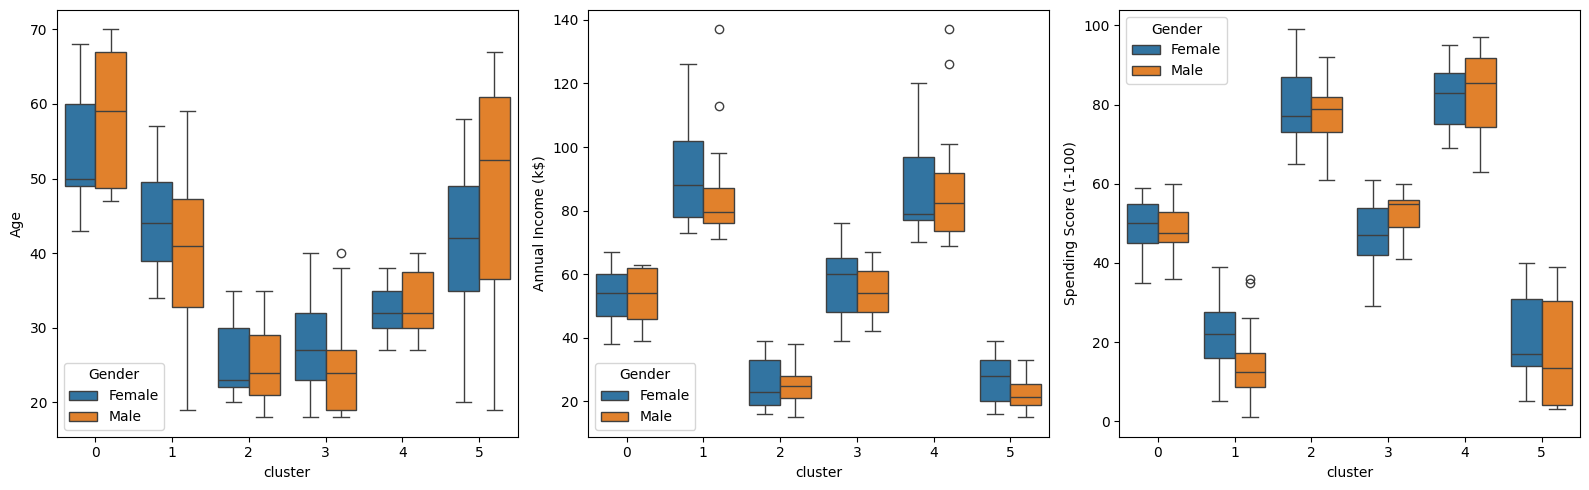

In [14]:
# Ajustando o tamanho e layout da figura
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), tight_layout=True)

# Adicionando cores distintas para os grupos de gênero utilizando a paleta "Set2"
for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, hue="Gender", palette="tab10", )

# Exibindo o gráfico
plt.show()